In [22]:
import numpy as np
from scipy import stats 

import matplotlib.pyplot as plt
%matplotlib inline

# I. Первинна обробка вибірки.

За вибірками А (парні варіанти) і В (непарні варіанти) скласти варіаційний ряд, обчислити
відносні частоти, побудувати графіки варіаційного ряду (гістограму і полігон відносних
частот), побудувати емпіричну функцію розподілу, обчислити числові
характеристики варіаційного ряду: вибіркове середне, дисперсію, середне
квадратичне відхилення, моду та медіану, коефіцієнт асиметрії та ексцес. 

In [23]:
a = np.array([ 11, 6, 7, 8, 7, 3, 7, 3, 3,12, 7, 9,12, 5,10,
                4, 7, 2, 7, 7, 4, 5,11, 5, 5, 6, 4, 5, 8, 9,
                8,12, 5, 6, 7,10,11, 9,13, 9, 3, 8,11, 9, 7,
               12, 6, 6,14,11, 9, 8,14, 6, 4,10, 8, 4, 6, 8,
                3, 6, 6, 7, 7, 6,10,11, 3,11, 8, 5, 8,11,11,
                6,11, 7, 8, 7,12, 5, 5, 9, 5, 7,10, 5, 7]) 

x = np.array([40, 40, 42, 41, 42, 41, 40, 41, 41, 39, 38, 39, 42, 40, 40, 41])


df_sorted = np.sort(a)
print('Варіаційний ряд = \n',df_sorted)

relative_frequency = stats.relfreq(a, numbins=12)
print('\n Відносні частоти = \n ',relative_frequency.frequency)


Варіаційний ряд = 
 [ 2  3  3  3  3  3  3  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9 10 10 10 10 10 11 11 11 11
 11 11 11 11 11 11 12 12 12 12 12 13 14 14]

 Відносні частоти = 
  [ 0.01123596  0.06741573  0.05617978  0.12359551  0.12359551  0.16853933
  0.19101124  0.05617978  0.11235955  0.05617978  0.01123596  0.02247191]


### Гістограма  та полігон відносних частот


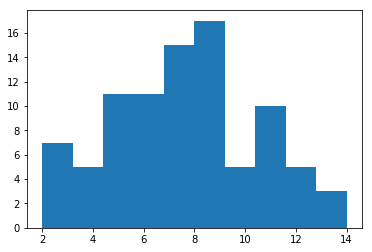

In [24]:
plt.hist(a, 10)
plt.show()

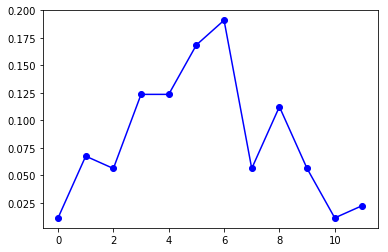

In [25]:
plt.plot(relative_frequency.frequency, marker='o', color='b')
plt.show()

### Емпірична функція розподілу

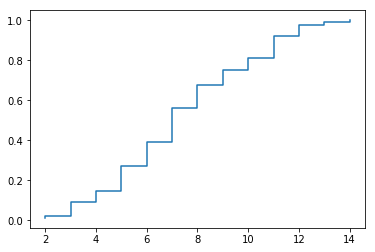

In [27]:
from statsmodels.distributions.empirical_distribution import ECDF    
cdf = ECDF(a)
plt.step(cdf.x, cdf.y)

#counts, bin_edges = np.histogram(a, bins=12)

#ecdf = np.cumsum(counts)
#ecdf = ecdf/ecdf[-1]


#plt.step(bin_edges[1:], ecdf)

plt.show()


### Описові статистики

     

In [17]:
dscp = stats.describe(a)


print('вибіркове середнє', dscp.mean ) 
print('вибіркова дисперсія = ',dscp.variance)
print('середне квадратичне відхилення = ',a.std(ddof=1))
print('модa = ', stats.mode(a)[0])
print('медіанa = ', np.median(a))
print('асиметрія = ', dscp.skewness)
print('ексцесс = ', dscp.kurtosis)
dscp

вибіркове середнє 7.52808988764
вибіркова дисперсія =  7.93386108274
середне квадратичне відхилення =  2.81671103998
модa =  [7]
медіанa =  7.0
асиметрія =  0.2586499093910767
ексцесс =  -0.6594167514610771


DescribeResult(nobs=89, minmax=(2, 14), mean=7.5280898876404496, variance=7.9338610827374856, skewness=0.2586499093910767, kurtosis=-0.6594167514610771)

# II. Оцінки параметрів розподілу.
2. Обчислити незміщені оцінки математичного сподівання, дисперсії та середнього
квадратичного відхилення генеральних сукупностей за вибірками А (парні варіанти), В
(непарні варіанти) і першим стовпцем X вибірки С (усі варіанти).
3. Знайти довірчі інтервали для математичного сподівання, дисперсії та середнього
квадратичного відхилення генеральної сукупності за першим стовпцем X вибірки С з
довірчою ймовірністю
$\gamma$
, де $\gamma = 0.8$

In [18]:
a_mean = a.mean()
a_var = a.var(ddof = 1)
a_std = a.std(ddof =1)
print('''
Вибіркове середнє A = {}, 
Незміщена вибіркова дисперсія  A = {}, 
Незміщене вибіркове середнє квадратичне відхиленя A =  {} 
'''.format(a_mean, a_var, a_std))


Вибіркове середнє A = 7.52808988764045, 
Незміщена вибіркова дисперсія  A = 7.933861082737486, 
Незміщене вибіркове середнє квадратичне відхиленя A =  2.816711039978628 


In [19]:
x_mean = x.mean()
x_var =  x.var(ddof = 1)
x_std = x.std(ddof = 1)
print('''
Вибіркове середнє X = {}, 
Незміщена вибіркова дисперсія  X = {}, 
Незміщене вибіркове середнє квадратичне відхиленя X =  {} 
'''.format(x_mean, x_var, x_std))


Вибіркове середнє X = 40.4375, 
Незміщена вибіркова дисперсія  X = 1.3291666666666666, 
Незміщене вибіркове середнє квадратичне відхиленя X =  1.1528949070347507 



### довірчі інтервали

In [20]:
stats.t.interval(0.80, len(x)-1, loc=x_mean, scale=x_std)

(38.891922622366984, 41.983077377633016)

In [21]:
stats.norm.interval(0.80, x_mean, scale=x_std)

(38.960005726981215, 41.914994273018785)

Довірчим інтервалом для  $S^2$  буде інтервал (T1,T2), де $T_1 = \frac{nS^2}{u_2} $,  a $ T_2 = \frac{nS^2}{u_1}$  $u_1 = \chi^2_{inv}(\frac{1-\gamma}{2},n)$, a $u_2 = \chi^2_{inv}((\frac{1+\gamma}{2},n)$


In [22]:
u_1 = stats.chi2.ppf((1-0.8)/2, len(x))
u_2 = stats.chi2.ppf((1+0.8)/2, len(x))

T1 = (len(x)*x_var)/u_2
T2 = (len(x)*x_var)/u_1

print(' довірчий інтервал [{}, {}]'.format(T1,T2))

 довірчий інтервал [0.9033566056459887, 2.283733558587954]


Довірчим інтервалом для $\sigma$ буде інтервал $(\sqrt{T1},\sqrt{T2})$, де $T_1, T_2$ розраховані вище


In [23]:
print(' довірчий інтервал [{}, {}]'.format(np.sqrt(T1),np.sqrt(T2)))

 довірчий інтервал [0.950450738147953, 1.5112026861370893]


### Довірчий інтервал для вибірки А (з розподілу Пуасона)

In [24]:
stats.poisson.interval(0.95, mu=a_mean)


(3.0, 13.0)

# III. Статистичні гіпотези.

## 1)
За першим стовпцем X вибірки С при рівні значушості $\alpha$ перевірити
гіпотезу про математичне сподівання $Н_0: а = а_0$ при альтернативній гіпотезі
$H_1$, якшо $\sigma$ -невідоме, де 
$$a_0 = \bar{[x]}-3 $$
$H_1 = a > a_0, ~~ \alpha = 0.01$

### Проведемо t- тест "вручну"

In [26]:
a_0 = np.floor(x.mean()) -3

t_stat = (x_mean - a_0)/(x.std()/np.sqrt(len(x)-1))
t_stat

11.926499038290526

### тепер порівняємо із вбудованим тестом

In [27]:
stats.ttest_1samp(x, a_0)

Ttest_1sampResult(statistic=11.926499038290526, pvalue=4.7011780874262301e-09)

### Висновок

Оскільки для правосторонньої гіопотези $H_1: a > a_0 $ при заданому рівні значущості $\alpha= 0.01$ $t_{критичне} = 2.602$, а наша отримана статистика   $t = 11.92649 $ значно більша, 
то нульову гіпотезу відхтляємо на користь альтернативної. 

## 2)
За вибіркою А при рівні значущості $\alpha = 0.01$ за критерієм узгодженості $\chi^2$
перевірити гіпотезу про розподіл Пуассона відповідної генеральної сукупності.

In [29]:
# побудуємо частотний ряд
unique, counts = np.unique(a, return_counts=True)
freeq_array = np.array((unique, counts)).T

freeq_array

array([[ 2,  1],
       [ 3,  6],
       [ 4,  5],
       [ 5, 11],
       [ 6, 11],
       [ 7, 15],
       [ 8, 10],
       [ 9,  7],
       [10,  5],
       [11, 10],
       [12,  5],
       [13,  1],
       [14,  2]])

In [30]:
prob = [stats.poisson.pmf(k, a_mean) for k in  freeq_array.T[0]] 
prob

[0.015238130865064684,
 0.038238006290611783,
 0.071964787119971604,
 0.10835147723681117,
 0.13594661001622371,
 0.14620261430316192,
 0.13757830278527874,
 0.11507798110628803,
 0.086631738585632626,
 0.059288319563201186,
 0.037193983246577543,
 0.021538434550740639,
 0.011581662238359712]

теоретичну частоту рохрахуємо за формулою йомовірність з розподілу Пуасона  помножити на розмір вибірки

In [31]:
theoretical_freeq = np.array([p*len(a) for p in prob])

In [32]:
difference = [(counts[i] - theoretical_freeq[i]) for i in range(len(counts))  ]

chi_sqr = sum([((difference[i]**2)/theoretical_freeq[i]) for i in range(len(difference))])

print('Хі квадрат =',chi_sqr)


Хі квадрат = 11.8084995316


In [33]:
difference

[-0.35619364699075695,
 2.5968174401355513,
 -1.4048660536774724,
 1.3567185259238066,
 -1.0992482914439101,
 1.9879673270185894,
 -2.2444689478898088,
 -3.2419403184596352,
 -2.7102247341213035,
 4.7233395588750948,
 1.6897354910545985,
 -0.9169206750159169,
 0.96923206078598567]

In [72]:
#визначимо критичне значення  хі квадрат
k = len(counts) -1 -1
chi_crit = stats.chi2.ppf(q = 0.99, df = k)
print('кількість степенів свободи = {}, critical value = {}'.format(k,chi_crit))

кількість степенів свободи = 11, critical value = 24.72497031131828


## Висновок
Оскільки отримана статистика $\chi^2 = 11.8084 < \chi_{критичне}^2$ ,то ми  приймаємо гіпотезу
про те що дана вибірка підпорядковується розподілу Пуасона.

# V. Кореляційний зв'язок. Регресія.

За вибіркою С побудувати кореляційне поле для двовимірної вибірки XY,
знайти вибірковий коефіцієнт кореляції, лінійні функції регресії та побудувати їх графіки.


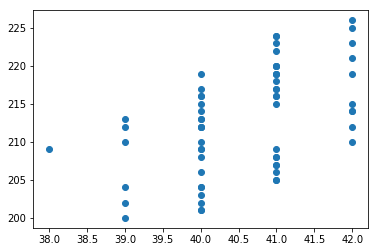

Коефіцієнт кореляції =  0.513425168668


In [15]:
x = np.array([40, 40, 42, 41, 42, 41, 40, 41, 41, 39, 38, 39, 42, 40, 40, 41,
              40, 39, 41, 42, 41, 42, 40, 41, 42, 40, 41, 40, 42, 40, 42, 41,
              41, 40, 41, 40, 41, 42, 42, 40, 40, 41, 40, 41, 41, 40, 41, 39,
              40, 40, 41, 40, 41, 40, 41, 39, 41, 41, 40, 41, 39, 41, 40])

y = [209, 201, 214, 222, 210, 219, 208, 208, 206, 200, 209, 202, 212, 206, 216, 220,
     212, 204, 224, 223, 215, 214, 210, 207, 215, 203, 207, 212, 226, 204, 221, 220,
     224, 213, 216, 213, 209, 225, 219, 215, 214, 223, 209, 220, 205, 212, 218, 210,
     219, 204, 205, 217, 217, 202, 219, 213, 219, 208, 201, 216, 212, 217, 216]

plt.scatter(x,y)
plt.show()

corelation = stats.stats.pearsonr(x,y,)

print('Коефіцієнт кореляції = ', corelation[0])

In [32]:
regression = stats.linregress(x,y) 
b_0 = regression.intercept
b_1 = regression.slope

#def y_expected(x):
#    return (b_0 + b_1*x)

#print('Коефіцієнт бета_0 = {}, Коефіцієнт бета_1 = {}'.format(b_0,b_1))

regression_x = stats.linregress(y,x) 
a_0 = regression_x.intercept
a_1 = regression_x.slope

#plt.plot(x, y,'o', x, y_expected(x),'r')

#plt.show()
print('Коефіцієнт бета_0 = {}, Коефіцієнт бета_1 = {}'.format(a_0,a_1))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

# VI. Однофакторний дисперсійний аналіз.

 За вибіркою E з рівнем значущості $\alpha=0,05$ перевірити гіпотезу про суттєвість впливу фактору F на відгук.

In [73]:
e = np.array([[29, 24],[31,26,22],[22,27,29,30],[18,27,19,27,21],[26,22,29,31],
                                                      [22,24,26,28],[26,24,28]])
E = np.array([np.array(i) for i in e])
print(E)

[array([29, 24]) array([31, 26, 22]) array([22, 27, 29, 30])
 array([18, 27, 19, 27, 21]) array([26, 22, 29, 31])
 array([22, 24, 26, 28]) array([26, 24, 28])]



## $H_0 :$ вплив факторів - суттєвий.
## $H_1 :$ вплив факторів - не суттєвий.

In [74]:
overall_mean = np.sum([np.sum([observation  for observation in group]) for group in E])/25
print('середнє по всіх групах = ',overall_mean)

середнє по всіх групах =  25.52


In [75]:
[group.mean() for group in E]

[26.5, 26.333333333333332, 27.0, 22.399999999999999, 27.0, 25.0, 26.0]

In [76]:
[group.std(ddof =1) for group in E]


[3.5355339059327378,
 4.5092497528228943,
 3.5590260840104371,
 4.3358966777357599,
 3.9157800414902435,
 2.5819888974716112,
 2.0]

In [77]:
TSS = np.sum([np.sum([(observation - overall_mean)**2 for observation in group]) for group in E])

SST = np.sum([(len(group))*((group.mean() - overall_mean)**2) for group in E])
SSE = np.sum([(len(group))*(group.var()) for group in E])
print('TTS = ', TSS)
print('SST = ', SST)
print('SSE = ', SSE)

print('TSS = SST + SSE =', SST+SSE)

TTS =  312.24
SST =  71.8733333333
SSE =  240.366666667
TSS = SST + SSE = 312.24


In [78]:
MST = SST/(len(E) -1)
MSE = SSE/(25 - 7)

F = MST/MSE

print('MST = ', MST)
print('MSE = ',MSE)
print('F = ', F)

# Знайдемо критичне значення для F 
crit = stats.f.ppf(q=1-0.01, dfn=7-1, dfd=25-7)
print('Критичне значення F = ',crit)

MST =  11.9788888889
MSE =  13.3537037037
F =  0.897046179448
Критичне значення F =  4.01463650735


### порівняємо результати з вбудованим тестом

In [79]:
stats.f_oneway([29, 24],[31,26,22],[22,27,29,30],[18,27,19,27,21],[26,22,29,31],[22,24,26,28],[26,24,28])

F_onewayResult(statistic=0.89704617944806531, pvalue=0.51802195250405703)

In [ ]:
stats.f_oneway([41],[25,33,29,33],[22,29,38,34],[32,35,22,37,36],[29,30],[22,24,26,28],[26,24,28])

## Висновок

Оскільки отримане значення F менше за критичне, ми відхиляємо гіпотезу про суттєвість впливу чинників, і приймаємо альтернативну гіпотезу що групи рівномірні.

Це також можна спостерігати з того, що значення F близьке до 1.

# Завдання 6.
 $2.$ За результатами колоквіуму студентів 4 курсу 2018 року перевірити гіпотезу про однорідність груп.
 $$\alpha = 0 , 05$$

In [38]:
import pandas as pd

df = pd.read_excel('2018.xlsx')

df.replace(["NaN"], np.nan, inplace = True)
df = df.dropna(axis = 1, how='all')
df = df[['група','бали']]
df = df[1:]

df.head()

,група,бали
1,42.0,10.5
2,42.0,9.4
3,41.0,9.0
4,42.0,9.0
5,42.0,9.0


In [39]:
g_1 = df.loc[df['група'] == 41]
g_2 = df.loc[df['група'] == 42]
g_3 = df.loc[df['група'] == 43]
g_3 = g_3.loc[df['бали'] != 0]

print('''
В першій групі - {} оцінка,
В другій групі - {} оцінок,
В третій групі - {} оцінок,
'''.format(len(g_1), len(g_2), len(g_3)))


В першій групі - 21 оцінка,
В другій групі - 25 оцінок,
В третій групі - 18 оцінок,



### Застосуємо критерій Вілкоксона для двох пар вибірок - оцінок МТМ41 та МТМ42 а також МТМ42 та МТМ43.
### Гіпотеза $H_0$ - всі вибірки однорідні.

In [40]:
def join_groups(x,y):
    frames = [x, y]
    return pd.concat(frames)

In [41]:
g_12 = join_groups(g_1, g_2)

In [42]:
g_12['Rank'] = g_12 ['бали'].rank()
g_12.head()

,група,бали,Rank
3,41.0,9.0,43.0
6,41.0,8.9,41.0
17,41.0,6.6,32.5
22,41.0,5.8,28.5
25,41.0,5.6,27.0


In [43]:
g_1r = g_12.loc[df['група'] == 41]
g_2r = g_12.loc[df['група'] == 42]


In [44]:
sum_1 = g_1r['Rank'].sum()
sum_2 = g_2r['Rank'].sum()

print('''
сума рангів першої групи = {};
сума рангів другої групи = {};
'''.format(sum_1,sum_2))


сума рангів першої групи = 411.5;
сума рангів другої групи = 669.5;



In [45]:
expected_s1 = (len(g_1)*(len(g_1)+len(g_2) +1 ))/2
expected_s2 = (len(g_2)*(len(g_1)+len(g_2) +1 ))/2

d = (len(g_1)*len(g_2)*(len(g_1)+len(g_2) +1 ))/12
print('''
очікувана сума рангів першої групи = {};
очікувана сума рангів другої групи = {};
дисперсія = {}
'''.format(expected_s1,expected_s2,d))


очікувана сума рангів першої групи = 493.5;
очікувана сума рангів другої групи = 587.5;
дисперсія = 2056.25



In [46]:
t_1 = (sum_1 - expected_s1)/np.sqrt(d)
t_2 = (sum_2 - expected_s2)/np.sqrt(d)

print('''
T1 = {};
T2 = {};
'''.format(t_1,t_2))


T1 = -1.808322536257506;
T2 = 1.808322536257506;



In [47]:
t1_crit = stats.norm.ppf(q=0.025)
t2_crit = stats.norm.ppf(q=0.975)

print('''
T1 критичне = {};
T2 критичне = {};
'''.format(t1_crit,t2_crit))


T1 критичне = -1.9599639845400545;
T2 критичне = 1.959963984540054;



### Висновок.
 Оскільки отримані значення статистик Т потрапляють в допустимий діапазон, то ми не маєм підстав відхиляти гіпотезу 
 $H_0$ для першої та другої групи.

In [48]:
g_23 = join_groups(g_2, g_3)

In [49]:
g_23['Rank'] = g_23 ['бали'].rank()

In [50]:
g_2r = g_23.loc[df['група'] == 42]
g_3r = g_23.loc[df['група'] == 43]

In [51]:
sum_2 = g_2r['Rank'].sum()
sum_3 = g_3r['Rank'].sum()

print('''
сума рангів другої групи = {};
сума рангів третьої групи = {};
'''.format(sum_1,sum_2))


сума рангів другої групи = 411.5;
сума рангів третьої групи = 638.0;



In [52]:
expected_s2 = (len(g_2)*(len(g_2)+len(g_3) +1 ))/2
expected_s3 = (len(g_3)*(len(g_2)+len(g_3) +1 ))/2

d = (len(g_2)*len(g_3)*(len(g_2)+len(g_3) +1 ))/12
print('''
очікувана сума рангів другої групи = {};
очікувана сума рангів третьої групи = {};
дисперсія = {}
'''.format(expected_s2,expected_s3,d))


очікувана сума рангів другої групи = 550.0;
очікувана сума рангів третьої групи = 396.0;
дисперсія = 1650.0



In [53]:
t_1 = (sum_2 - expected_s2)/np.sqrt(d)
t_2 = (sum_3 - expected_s3)/np.sqrt(d)

print('''
T1 = {};
T2 = {};
'''.format(t_1,t_2))


T1 = 2.166410241236256;
T2 = -2.166410241236256;



In [54]:
t1_crit = stats.norm.ppf(q=0.025)
t2_crit = stats.norm.ppf(q=0.975)

print('''
T1 критичне = {};
T2 критичне = {};
'''.format(t1_crit,t2_crit))


T1 критичне = -1.9599639845400545;
T2 критичне = 1.959963984540054;



### Висновок.
 Оскільки отримані значення статистик Т  не потрапляють в допустимий діапазон, то ми відхиляємо гіпотезу 
 $H_0$ для другої та третьої групи.

In [55]:
g_13 = join_groups(g_1, g_3)

In [56]:
g_13['Rank'] = g_13 ['бали'].rank()

In [57]:
g_1r = g_13.loc[df['група'] == 41]
g_3r = g_13.loc[df['група'] == 43]

In [58]:
sum_1 = g_1r['Rank'].sum()
sum_3 = g_3r['Rank'].sum()

print('''
сума рангів першої групи = {};
сума рангів третьої групи = {};
'''.format(sum_1,sum_3))


сума рангів першої групи = 431.0;
сума рангів третьої групи = 349.0;



In [59]:
expected_s1 = (len(g_1)*(len(g_1)+len(g_3) +1 ))/2
expected_s3 = (len(g_3)*(len(g_1)+len(g_3) +1 ))/2

d = (len(g_1)*len(g_3)*(len(g_1)+len(g_3) +1 ))/12
print('''
очікувана сума рангів другої групи = {};
очікувана сума рангів третьої групи = {};
дисперсія = {}
'''.format(expected_s2,expected_s3,d))


очікувана сума рангів другої групи = 550.0;
очікувана сума рангів третьої групи = 360.0;
дисперсія = 1260.0



In [60]:
t_1 = (sum_1 - expected_s1)/np.sqrt(d)
t_2 = (sum_3 - expected_s3)/np.sqrt(d)

print('''
T1 = {};
T2 = {};
'''.format(t_1,t_2))


T1 = 0.3098898934004561;
T2 = -0.3098898934004561;



##  Висновок.

Групи МТМ41 та МТМ42, а також МТМ41 та МТМ43 мають однорідні бали за колоквіум, але для заданого рівня значущості
групи МТМ42 та МТМ43 є неоднорідними, а отже, при $\alpha = 0.05$ ми відхиляємо гіпотезу про однорідність груп.